0.0009135555111312138


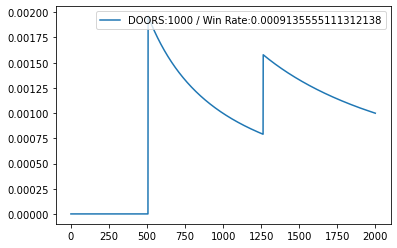

0.00014378235654286458


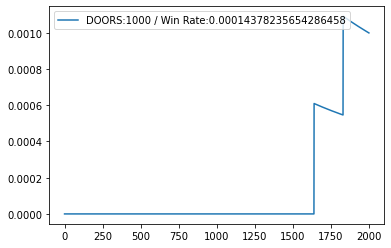

0.0


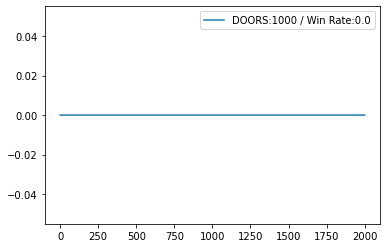

0.0016645256542266054


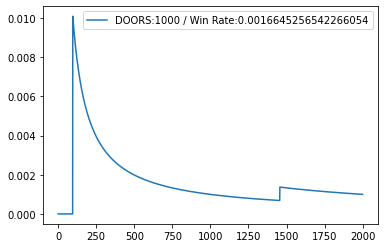

0.0002326682640908923


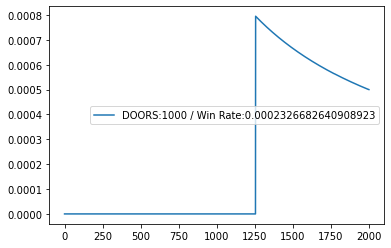

In [17]:
import random

# 始めに、箱の数を決める
NUM_DOORS = 1000

def monty(change):
    i = 0
    doors =[]
    
    # 初期化
    for i in range(NUM_DOORS):
        doors.append(0)
    
    # 当たり(1)の箱を決める
    atari = random.randint(0, 100000) % NUM_DOORS
    doors[atari] = 1
    
    # 箱を選ぶ
    myChoice = random.randint(0, 100000) % NUM_DOORS
    #print("atari:" + str(atari) + " / myChoice:" + str(myChoice))
    
    # 外れ(0)の箱を開ける
    
    counter = 1
    for i in range(NUM_DOORS):
        if doors[i] == 0 and i != myChoice:
            doors[i] = -1
            counter = counter + 1
            break
            
    # 箱を変更する時        
    if change == 1:
        while(1):
            i = random.randint(0, 100000) % NUM_DOORS
            if doors[i] != -1 and i != myChoice:
                myChoice_backup = myChoice
                myChoice = i
                
                             
                break
            i = i + 1;        
            
    # 当たった場合    
    if doors[myChoice] == 1:
        result = 1
        
    # 外れた場合
    if doors[myChoice] != 1:
        result = 0
    
    # print("result:" + str(result) + ":atari:" + str(atari) + " / changed to:" + str(myChoice) )
    
    return result

import os
import matplotlib.pyplot as plt
import numpy as np
import statistics

counter_0 = 0
counter_1 = 0

for j in range(5):

    ratio = []
    N = 2000
    x = np.arange(N)

    counter_0 = 0
    counter_1 = 0
    
    for i in range(N):
        if(monty(1)==1):
            counter_0 = counter_0 + 1
        if(monty(1)==0):
            counter_1 = counter_1 + 1

        ratio.append(counter_0 / (counter_1 + counter_0 + 1))
       
    avg = statistics.mean(ratio)
    print(avg)
        
    labelstr = "DOORS:" + str(NUM_DOORS) + " / " + "Win Rate:" + str(avg)
    plt.plot(x, ratio, label=labelstr)
    
    plt.legend()
    plt.show()
